# Kmeans Practice


In this notebook, data on eruptions from famous geyser in Yellowstone Park is used for illustration purpose. It contains only two attributes, waiting time between eruptions (minutes) and length of eruption (minutes). This small dataset with just two attributes will be easier to create a simple k-means cluster model.

The activities in this notebook are similar to what you seen in the lab notebook. Most of the activities are either partially complete for you to finish them while some of them might require you to work out the whole code for the activity. 

Kmeans is a kind of iterative descent algorithm, where you repeatedly find the minimum until it converges. A potential issue with this kind of algorithm is that it is not guaranteed to find the most optimal cluster arrangement, if you pick the wrong starting points. One method for overcoming this is to run the algorithm a number of times with different randomly selected starting points, and then pick the solution that has the lowest total squared Euclidean distance. This approach is used in the scikit-learn package, defaulting to 10 separate repetitions.

Scikit-learn uses numpy arrays, so make sure you format your data accordingly.

In [6]:
import numpy as np
import pandas as pd
from sklearn import cluster
from matplotlib import pyplot
import numpy as np
import pandas as pd
from sklearn import cluster
from matplotlib import pyplot
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

In [7]:
eruptions = pd.read_csv("../../../datasets/eruptions/eruptions.txt")
eruptions[:4]
eruptions.head()

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


In [9]:
eruptions.describe()

,eruptions,waiting
count,272.000000,272.000000
mean,3.487783,70.897059
std,1.141371,13.594974
min,1.600000,43.000000
25%,2.162750,58.000000
50%,4.000000,76.000000
75%,4.454250,82.000000
max,5.100000,96.000000


**Activity 1: ** Convert the data "eruptions" into an array and save the result in variable called eruptions_data. 

In [50]:
# Your code for activity 1 goes here...

eruptions_data = np.array(eruptions)

# Print first five rows of data
eruptions_data[:5]

array([[  3.6  ,  79.   ],
       [  1.8  ,  54.   ],
       [  3.333,  74.   ],
       [  2.283,  62.   ],
       [  4.533,  85.   ]])

**Activity 2: ** Run the Kmeans algorithm on eruptions_data with two clusters.

In [51]:
# Your code for activity 2 goes here...
from sklearn.cluster import KMeans

k = 2
kmeans = KMeans(n_clusters=k)
kmeans.fit(eruptions_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Get the locations of the centroids and the label of the owning cluster for each observation in the data set:

In [52]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

**Activity 3: ** PLot the clusters Using these, we can now plot the chosen clusters and their calculated centroids:

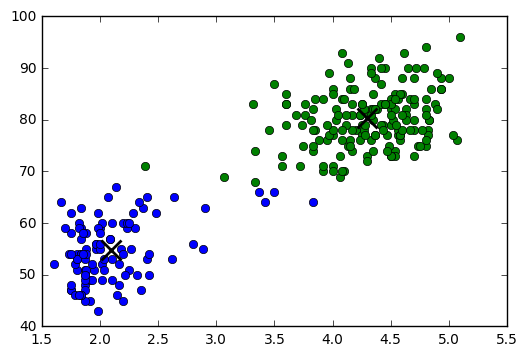

In [53]:
# Your code for activity 3 goes here...

for i in range(k): # repeat loop n times for n clusters
    ds = eruptions_data[np.where(labels==i)] # Get the data for indexes where label is equal to a particular cluster
    pyplot.plot(ds[:,0],ds[:,1],'o')  
    lines = pyplot.plot(centroids[i,0],centroids[i,1],'kx')
    pyplot.setp(lines,ms=15.0)
    pyplot.setp(lines,mew=2.0)
pyplot.show()


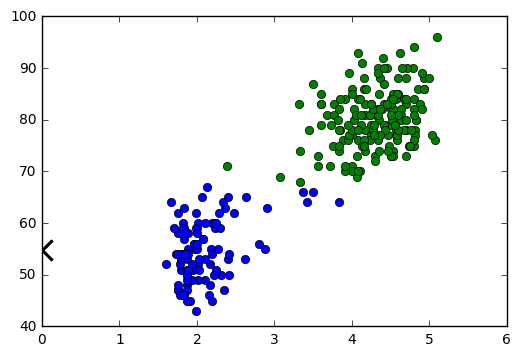

In [54]:
# Your code for activity 3 goes here...

for i in range(k): # repeat loop n times for n clusters
    ds = eruptions_data[np.where(labels==i)] # Get the data for indexes where label is equal to a particular cluster
    pyplot.plot(ds[:,0],ds[:,1],'o')  
    lines = pyplot.plot(centroids[0,1],'kx')
    pyplot.setp(lines,ms=15.0)
    pyplot.setp(lines,mew=2.0)
pyplot.show()

In [12]:
# Your code for activity 3 goes here...

for i in range(k): # repeat loop n times for n clusters
    ds = eruptions_data[np.where(labels==i)] # Get the data for indexes where label is equal to a particular cluster
    pyplot.plot(<first column in ds>,<second column in ds>,'o')  
    lines = pyplot.plot(<ith centroid x value>,<ith centroid y value>,'kx')
    pyplot.setp(lines,ms=15.0)
    pyplot.setp(lines,mew=2.0)
pyplot.show()

SyntaxError: invalid syntax (<ipython-input-12-4333c7e662cd>, line 5)

Run the Kmeans algorithm on eruptions_data with two clusters.

In [55]:
k=6
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(eruptions_data)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

**Activity 4: ** PLot the clusters with above generated labels and 6 centroids.

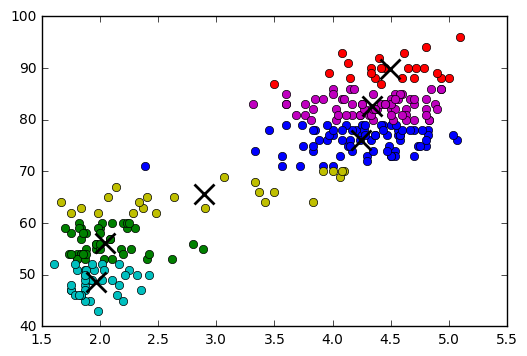

In [56]:
# Your code for activity 4 goes here...

for i in range(k):
    ds = eruptions_data[np.where(labels==i)]
    pyplot.plot(ds[:,0], ds[:,1],'o')  
    lines = pyplot.plot(centroids[i,0],centroids[i,1],'kx')
    pyplot.setp(lines,ms=15.0)
    pyplot.setp(lines,mew=2.0)
pyplot.show()

In [ ]:
# Your code for activity 4 goes here...

for i in range(k):
    ds = data[<what goes in here>]
    pyplot.plot(<first column in ds>,<second column in ds>,'o')  
    lines = pyplot.plot(<ith centroid x value>,<ith centroid y value>,'kx')
    pyplot.setp(lines,ms=15.0)
    pyplot.setp(lines,mew=2.0)
pyplot.show()

The scikit-learn package also has a function that allows you to get the centroids and labels directly:

In [57]:
k=2
from sklearn import cluster
centroids,labels,inertia = cluster.k_means(eruptions_data,n_clusters=k)

By using the KMeans object directly we can make predictions on new observations and assign them to clusters. Split the data into a training set and a test set so that K-means clustering can be performed on training set and use the test set to make predictions. A simple way to do a random split of the data is shown below.

In [58]:
import numpy as np
import numpy.random as npr

def split_data(data,train_split=0.8):
    num_train = data.shape[0] * train_split
    npr.shuffle(data)
    
    return (data[:num_train],data[num_train:])

training_data,test_data = split_data(eruptions_data)

/usr/lib/python3.4/site-packages/ipykernel/__main__.py:8: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


Ignore the warning here. The predictions are then simply calculated:

In [59]:
labels = kmeans.predict(test_data)

Plotting the predictions, as before, for 2 clusters

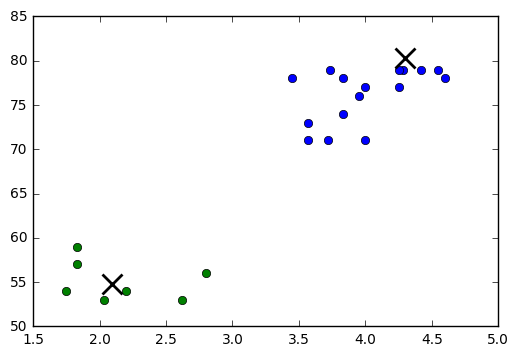

In [60]:
for i in range(k):
    ds = test_data[np.where(labels==i)]
    pyplot.plot(ds[:,0],ds[:,1],'o')
    lines = pyplot.plot(centroids[i,0],centroids[i,1],'kx')
    pyplot.setp(lines,ms=15.0)
    pyplot.setp(lines,mew=2.0)
pyplot.show()